Diffusers needs `libGL` to run, otherwise we get this import error:<br/>
`ImportError: libGL.so.1: cannot open shared object file: No such file or directory`

We therefore install it.

In [1]:
! apt-get update -qq
! apt-get install -y -qq libgl1-mesa-glx

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers.pipelines.prompt2prompt.pipeline_prompt2prompt import Prompt2PromptPipeline, AttentionReplace

/Users/umer/.local/share/virtualenvs/notebooks-cFP-wGb-/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
device

'mps'

In [6]:
pipe = Prompt2PromptPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

Fetching 16 files:   0%|                                                                             | 0/16 [00:00<?, ?it/s]



Fetching 16 files:   6%|████▎                                                                | 1/16 [00:00<00:09,  1.53it/s]









Fetching 16 files:  19%|████████████▉                                                        | 3/16 [00:00<00:02,  4.84it/s]







































Fetching 16 files:  19%|████████████▉                                                        | 3/16 [00:19<00:02,  4.84it/s]



































































































































































































































































































































































































































































In [9]:
def show_images(images):
    for im in images:
        plt.imshow(np.array(im))
        plt.show()

## Test: ReplaceEdit

In [13]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball",
           "A monkey playing with a ball"]

cross_attention_kwargs = {
    "edit_type": "replace",
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4
}

In [ ]:
generator = torch.Generator().manual_seed(0)
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=generator, cross_attention_kwargs=cross_attention_kwargs)

 34%|█████████████████████████████▌                                                         | 17/50 [00:17<00:25,  1.30it/s]

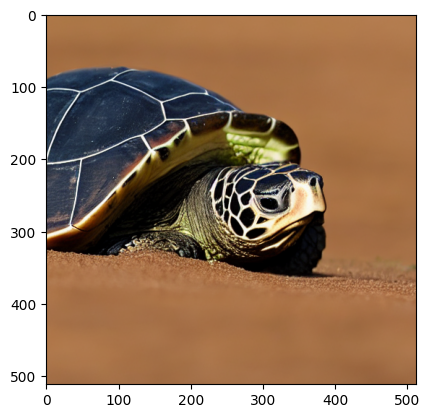

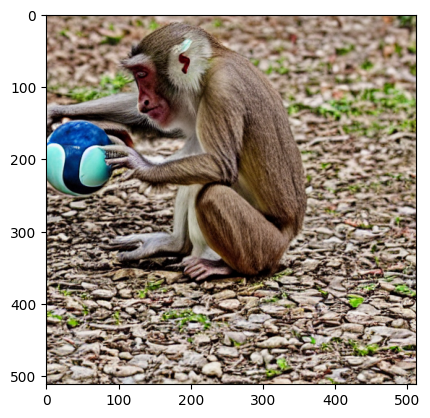

In [8]:
show_images(outputs.images)

## ReplaceEdit + LocalBlend

In [9]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball",
           "A monkey playing with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
    "local_blend_words": ["turtle", "monkey"]
}

In [10]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='replace', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:24<00:00,  2.04it/s]


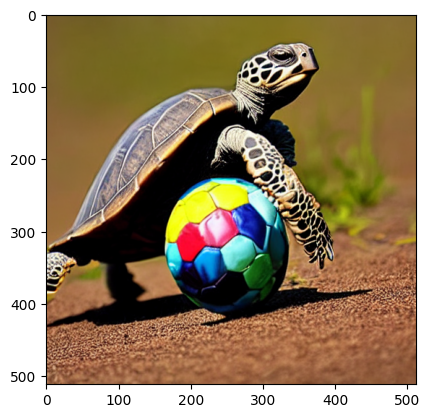

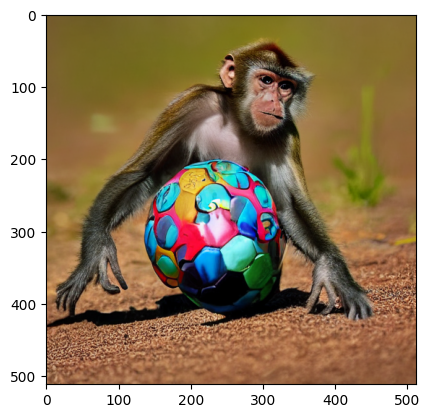

In [11]:
show_images(outputs.images)

## RefineEdit

In [12]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle",
           "A turtle in a forest"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
}

In [13]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='refine', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:24<00:00,  2.03it/s]


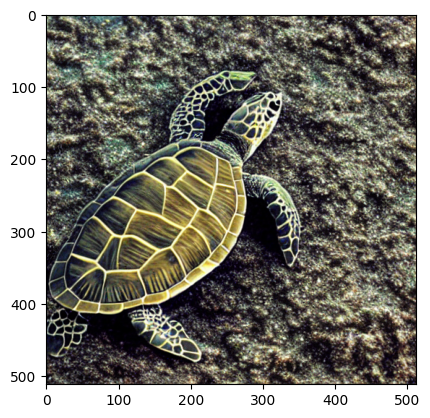

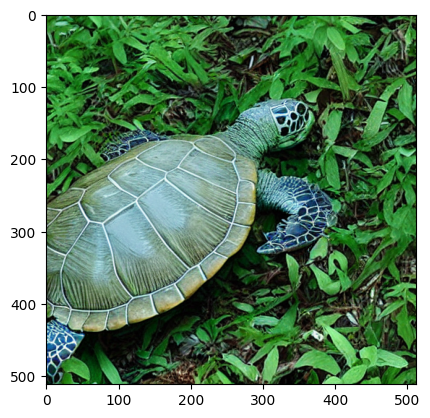

In [14]:
show_images(outputs.images)

## RefineEdit + LocalBlend

In [15]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A cat",
           "A cat with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
    "local_blend_words": ["with", "a" , "ball"]
}

In [16]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='refine', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:24<00:00,  2.02it/s]


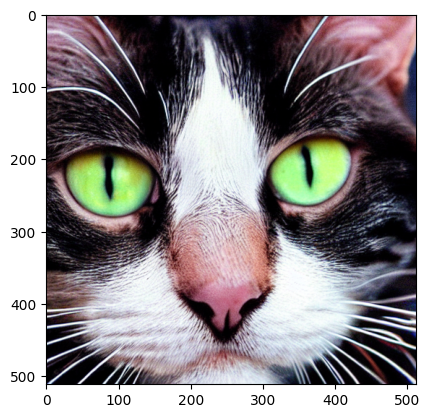

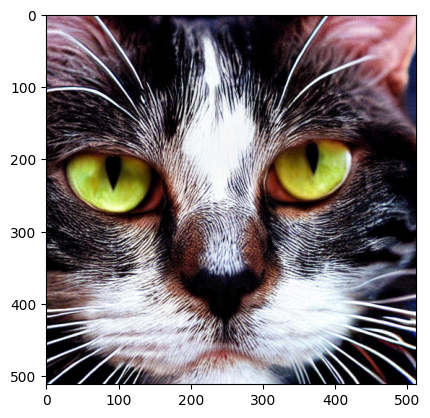

In [17]:
show_images(outputs.images)

## ReweightEdit

In [18]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A smiling turtle"] * 2

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4,
    "equalizer_words": ["smiling"],
    "equalizer_strengths": [5]
}

In [19]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='reweight', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:24<00:00,  2.04it/s]


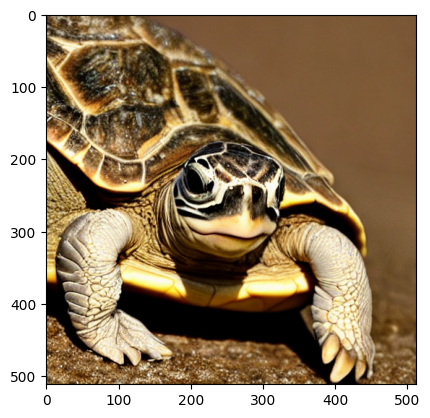

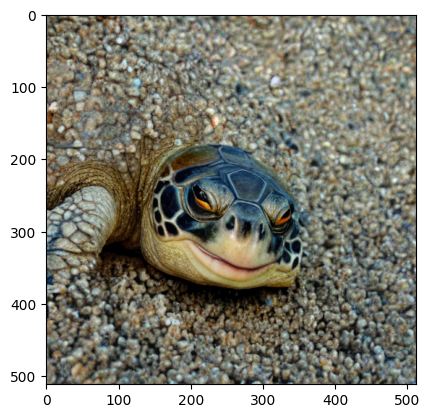

In [20]:
show_images(outputs.images)

## Save and ReplaceEdit

In [21]:
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball"]

In [22]:
outputs = pipe(prompt=prompts, height=512, width=512, num_inference_steps=NUM_DIFFUSION_STEPS, generator=g_cpu, edit_type='save', edit_kwargs=edit_kwargs)

100%|██████████| 50/50 [00:13<00:00,  3.74it/s]


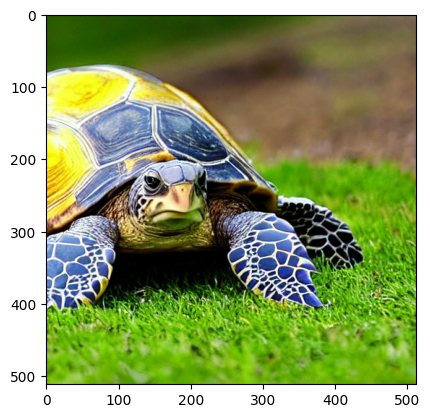

In [23]:
show_images(outputs.images)

In [24]:
# TODO: Allow to run pipeline to get a good image, and then do edit on it
NUM_DIFFUSION_STEPS = 50

prompts = ["A turtle playing with a ball",
           "A monkey playing with a ball"]

edit_kwargs = {
    "cross_replace_steps": 0.4,
    "self_replace_steps": 0.4
}